# IPL Analysis

## About:

There are various datasets that provide information about IPL matches,players,seasons,teams..
Here,"Match Data " and "Deliveries Data" are two components that provide detailed information about  indiviual matches and every ball bowled in matches.
Deliveries Data allows analysis of runscored,wickets taken, about fielding stats



# Importing Required Modules
1.importing numpy for mathematical operation on arrays and dataframe.                             
2.importing pandas for reading data and data manipualtion.                                              
3.importing matplotlib and seaborn to show the insights and visualization from the dataset.                       
4.importing warnings for Warning messages that are typically issued in dataframe where it is useful to alert the user of some condition in a program, where that condition (normally) doesn t warrant raising an exception and terminating the program.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset 'matches' and Checking the NaN Values , Data Types , and Statistical Analysis

1. Since data is in form of excel file we have to use pandas excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [12]:
matches=pd.read_csv('matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [13]:
matches.shape

(636, 18)

In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [15]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

### Drop column 'umpire3', as all entries are null

In [16]:
matches.drop('umpire3', axis=1, inplace=True)

#### # Entries for "winner" and "player_of_match" columns are null, when there is no result for the match, so
#### will fill both column null entries with "no result"

In [17]:
matches['winner'].fillna('no result', inplace=True)
matches['player_of_match'].fillna('no result', inplace=True)

#### # As all 7 missing cities belong to venue = Dubai International Cricket Stadium, so lets put city as Dubai

In [18]:
matches['city'].fillna('Dubai', inplace=True)

#### # For one match both "umpire1" and "umpire2" are having null entries, so lets put "missing" as value

In [20]:
matches['umpire1'].fillna('missing', inplace=True)
matches['umpire2'].fillna('missing', inplace=True)

#### # Check whether all null values are fixed

In [21]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

## Data type of each columns

In [22]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

## Read first 5 records of the dataset

In [23]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,missing,missing


##  frequency of most man of the match awards

In [24]:
matches['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
                  ..
MR Marsh           1
A Singh            1
P Parameswaran     1
KV Sharma          1
BCJ Cutting        1
Name: player_of_match, Length: 202, dtype: int64

## top 10 players with maximum man of the match award

In [25]:
matches['player_of_match'].value_counts()[0:10]

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

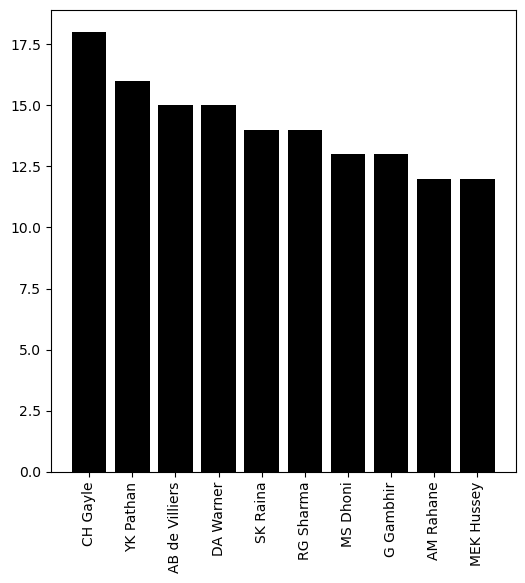

In [27]:
plt.figure(figsize=(6,6))
plt.bar(list(matches['player_of_match'].value_counts()[0:10].keys()),list(matches['player_of_match'].value_counts()[0:10]),color='k')
plt.xticks(rotation=90)
plt.show()



##  Getting the frequency of result column

In [28]:
matches['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

## Finding the number of toss wins in each team

In [29]:
matches['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

## Extracting the records of a team who won batting first

In [30]:
batting_first=matches[matches['win_by_runs']!=0] 
batting_first

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,missing,missing
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin


In [46]:
batting_first.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


#### plotting a histogram

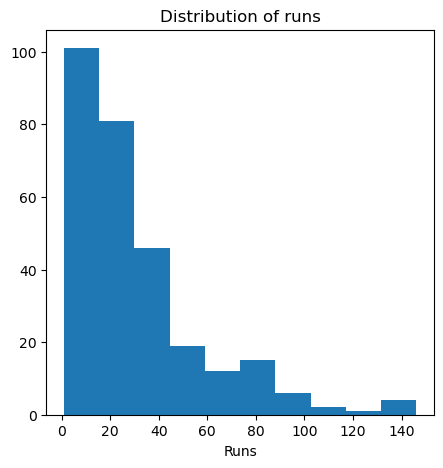

In [47]:
plt.figure(figsize=(5,5))
plt.hist(batting_first["win_by_runs"])
plt.title("Distribution of runs")
plt.xlabel("Runs")
plt.show()


## winners of each team after  first batting

In [48]:
batting_first['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

## Making a  plot for winners of top 5 teams after first batting 

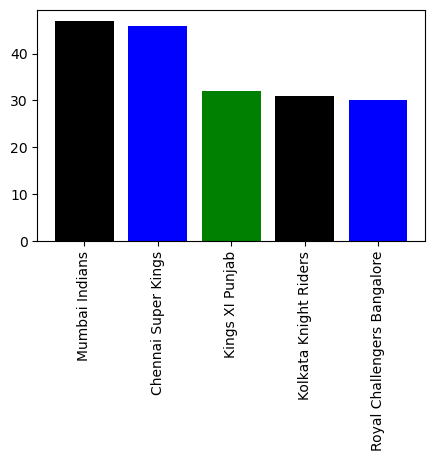

In [55]:
plt.figure(figsize=(5,3))
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),list(batting_first['winner'].value_counts()[0:5]),
        color=["black","blue","green"])
plt.xticks(rotation=90)
plt.show()


##  Pie Chart for winners of top 3 teams after first batting 

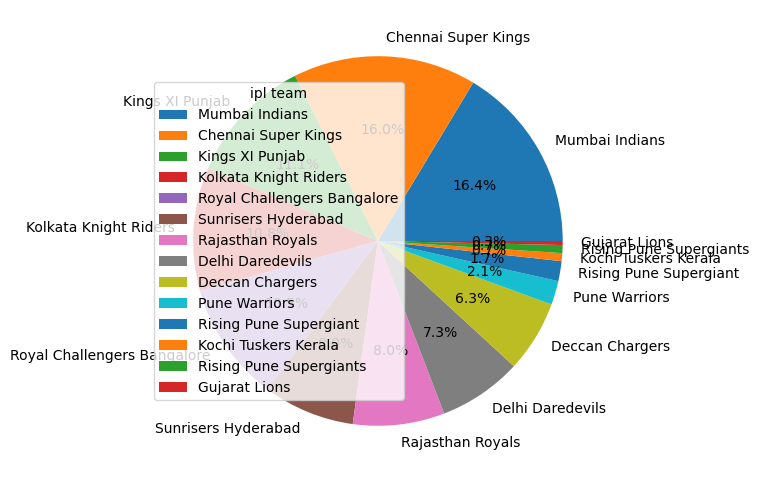

In [68]:
plt.figure(figsize=(6,6))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts()
                                                                 .keys()),autopct='%0.1f%%')
plt.legend(loc='center left',title='ipl team')
plt.show()


## records of team who has won after batting second

In [31]:
batting_second=matches[matches['win_by_wickets']!=0]

In [6]:
batting_second.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


## histogram for  frequency of wins with number of wickets

(array([ 1.,  4., 15., 34., 57., 68., 70., 48., 32., 10.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

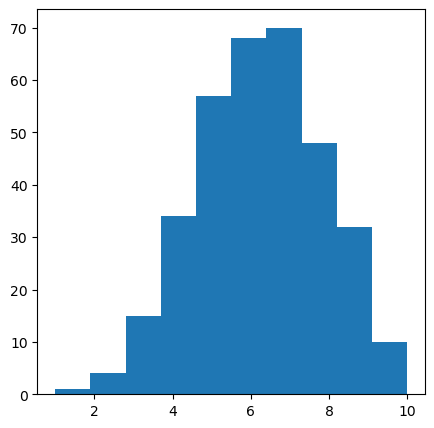

In [78]:
plt.figure(figsize=(5,5))
plt.hist(batting_second['win_by_wickets'])


## winners of each team after batting second

In [79]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

## bar plot for winners of top 5 teams after batting second

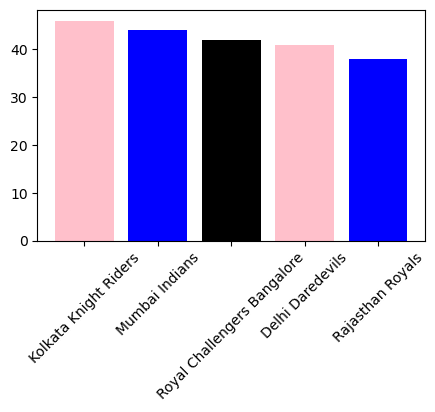

In [84]:
plt.figure(figsize=(5,3))
plt.bar(list(batting_second['winner'].value_counts()[0:5].keys())
        ,list(batting_second['winner'].value_counts()[0:5]),color=["pink","blue","black"])
plt.xticks(rotation=45)
plt.show()


## pie chart for winners who won most after batting second

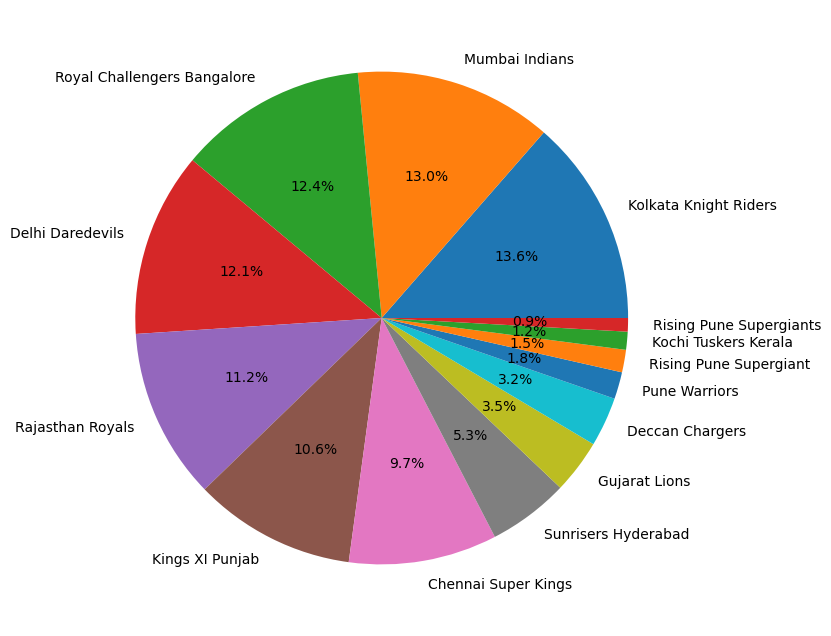

In [90]:
plt.figure(figsize=(8,8))
plt.pie(list(batting_second['winner'].value_counts()),
        labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()


## number of matches played in each city

In [32]:
matches['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Dubai              7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

## number of matches played each season

In [33]:
matches['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

## Reading Dataset 'deliveries' and Checking the NaN Values , Data Types , and Statistical Analysis

In [46]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [47]:
deliveries['match_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [35]:
match_1=deliveries[deliveries['match_id']==1]
match_1.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
match_1.shape

(248, 21)

### Handle null values for delieveries data.

In [48]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

#### # Check when the fielder is required, so that we can analyse what we can enter for null entries

In [53]:
deliveries[(deliveries['dismissal_kind'] != 'not out') & 
           (deliveries['fielder'].isna() == False)]['dismissal_kind'].unique()
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,na


#### ## Replace it with 'na', as fielder value doesn't make any sense in this

In [55]:
deliveries['fielder'].fillna('na', inplace=True)
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,na


#### ### Check whether all null values are fixed

In [56]:
#deliveries.isna().sum()

In [36]:
srh = match_1[match_1['inning']==1]
srh['batsman_runs'].value_counts()


1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [37]:
rcb=match_1[match_1['inning']==2]
rcb['batsman_runs'].value_counts()


0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

## Reading given data

In [38]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


#  Combine both matches and deieveries data

In [57]:
ipl= matches.merge(deliveries, left_on='id', right_on='match_id')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,na
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,na
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,na
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,na
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,na


In [61]:
## Remove the match_id, as that match_id and id column is replaced
ipl.drop('id', axis=1, inplace=True)
ipl.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,NaN,NaN,na
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,NaN,NaN,na
2,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,...,0,0,0,0,4,0,4,NaN,NaN,na
3,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,NaN,NaN,na
4,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,...,0,0,0,0,0,2,2,NaN,NaN,na


# Exploratory data analysis:

### Total matches played

In [62]:
print("Total number of matches played: {}".format(matches.shape[0]))

Total number of matches played: 636


### Matches played in different cities

Text(0.5, 1.0, 'Matches played in different cities')

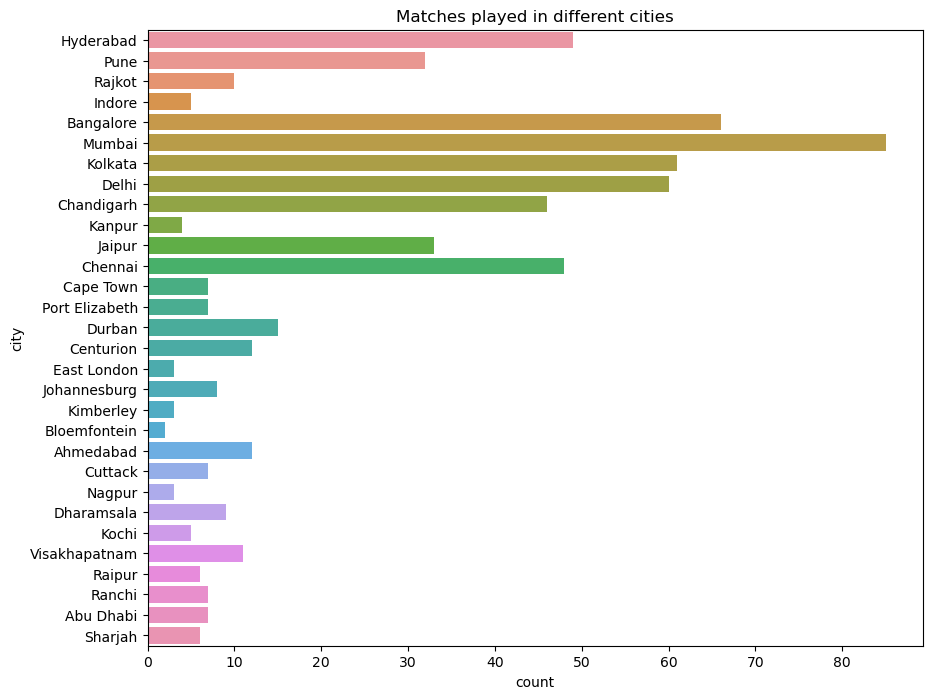

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(y='city', data=matches)
plt.title("Matches played in different cities")



# Here,We can see from the above countplot, 
# that maximum number of matches are played in "Mumbai",
# and minimum number of matches are played in "Bloemfontein"

### Matches played in different stadium

Text(0.5, 1.0, 'Matches played in different stadium')

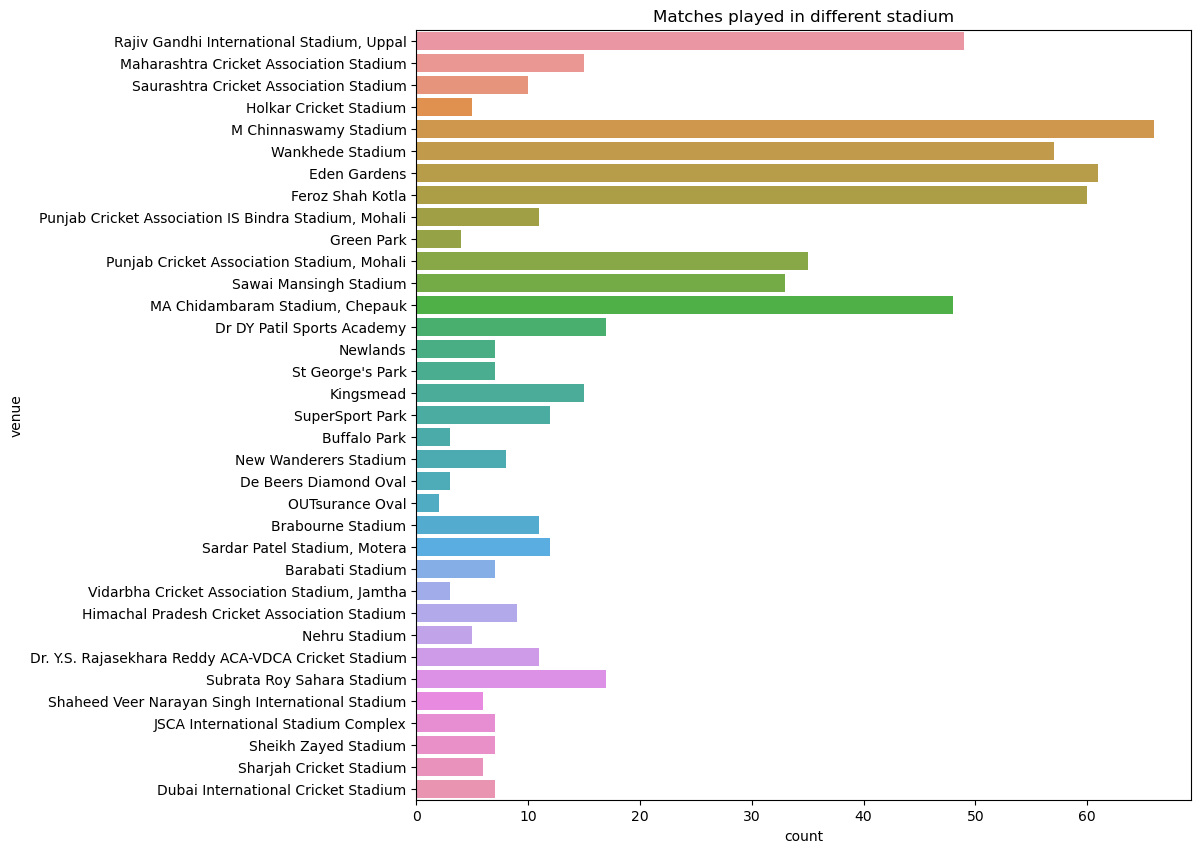

In [65]:
plt.figure(figsize=(10,10))
sns.countplot(y='venue', data=matches)
plt.title("Matches played in different stadium")


# Maximum matches are played in "M chinaswamy stadium" and
# minimum matches are played in "OUTsurance Oval"

### Who won maximum matches

Text(0.5, 1.0, 'Matches won by the teams')

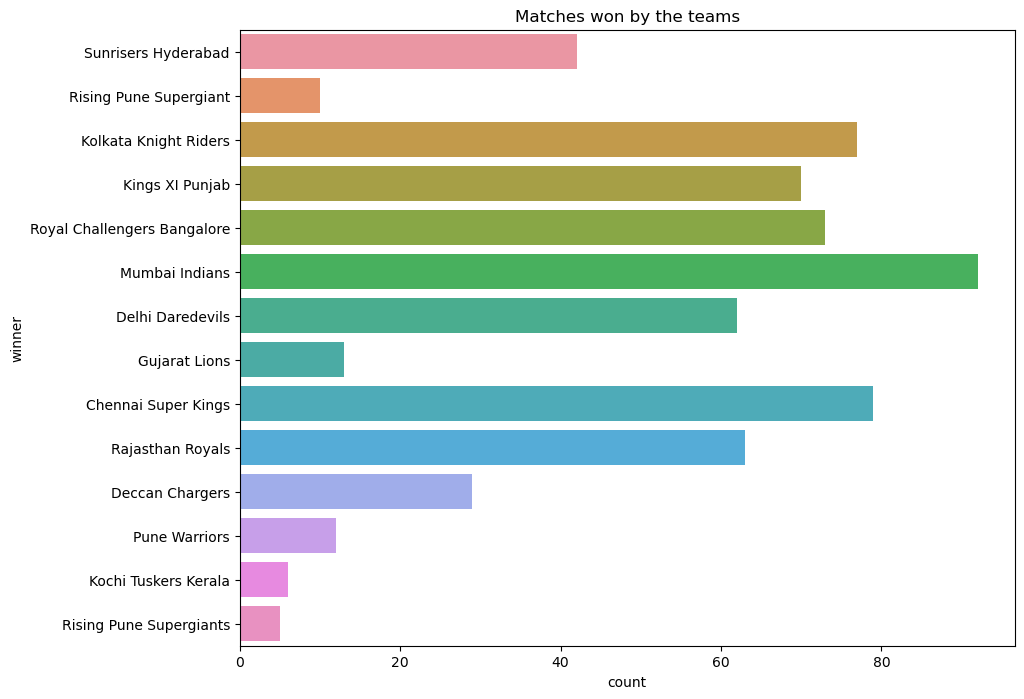

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(y='winner', data=matches)
plt.title("Matches won by the teams")


# Mumbai Indias won most of the matches,
# and there are approximately three matches that do not have any result.

###  Decision for Toss whether batting or bowling

Text(0.5, 1.0, 'Decision to field or batting depending on toss')

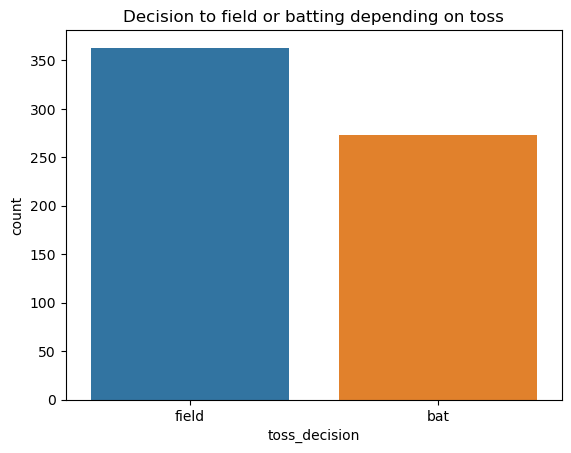

In [76]:
sns.countplot(x='toss_decision',data=matches)
plt.title("Decision to field or batting depending on toss")

# Here most of the teams chooses to field

### Wins depending on field or batting

In [73]:
conditions = [
    (((matches['toss_decision'] == 'field') & 
     (matches['toss_winner'] == matches['winner'])) |
     ((matches['toss_decision'] == 'bat') & 
     (matches['toss_winner'] != matches['winner']))
    ),
    (((matches['toss_decision'] == 'field') & 
     (matches['toss_winner'] != matches['winner'])) |
     ((matches['toss_decision'] == 'bat') & 
     (matches['toss_winner'] == matches['winner']))
    )
]


values = ['field', 'bat']

# Column will have 'field' as value if toss_winner chooses 'field' and it wons, otherwise 'bat'
matches['win_field_or_bat'] = np.select(conditions, values) 

Text(0.5, 1.0, 'Matches won by the fielding team and batting team')

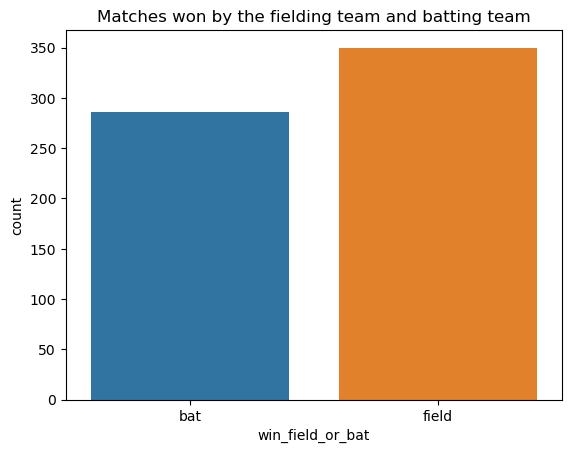

In [74]:
sns.countplot(x='win_field_or_bat', data=matches)
plt.title("Matches won by the fielding team and batting team")


# Most of the matches are won by the team who choose field first

### Difference of runs by which fielding team won

Text(0.5, 1.0, 'Win run differences')

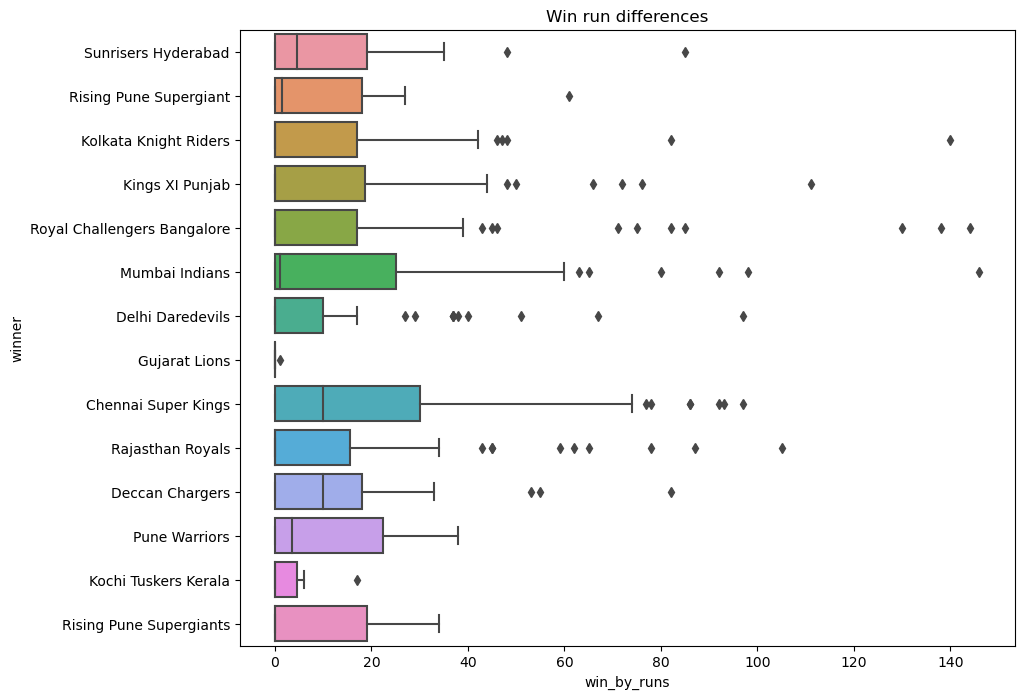

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(y='winner', x='win_by_runs', data=matches)
plt.title("Win run differences")


# Mumbai Indian won by the maximum run difference of app. 150 runs followed by Royal challengers Banglore.

###  Maximum wicket difference for win

Text(0.5, 1.0, 'Wicket differences')

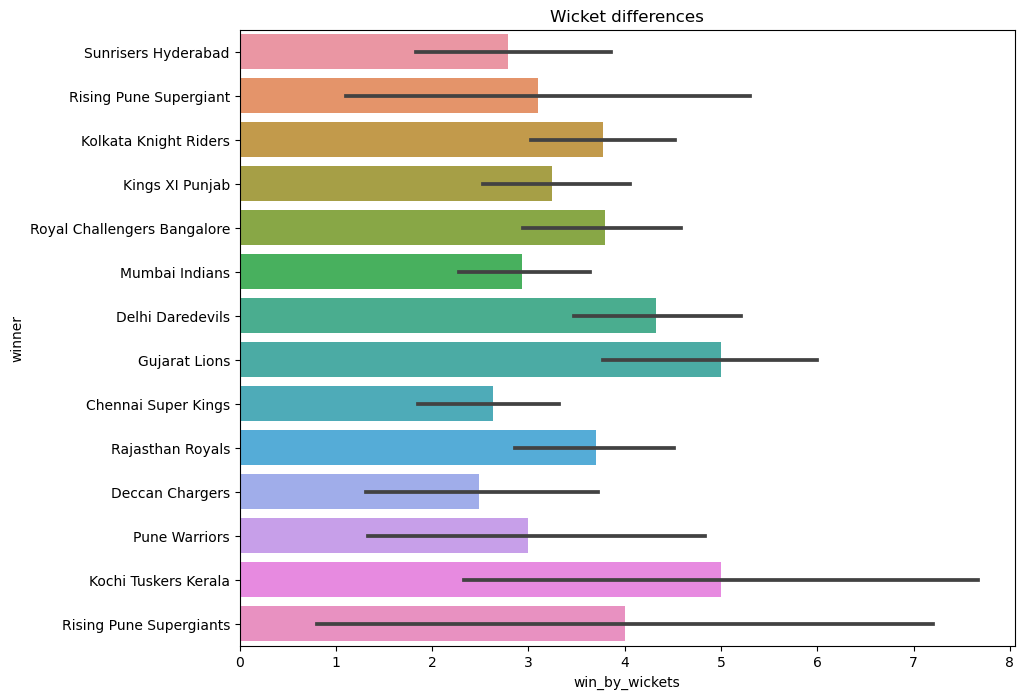

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(y='winner', x='win_by_wickets', data=matches)
plt.title("Wicket differences")


# There are many teams who won by the wicket difference of 10,
# but the data is left skewed like most teams won with less than 5 wickets.

### Player with most of the time man of the match

Text(0.5, 1.0, 'Man of the match')

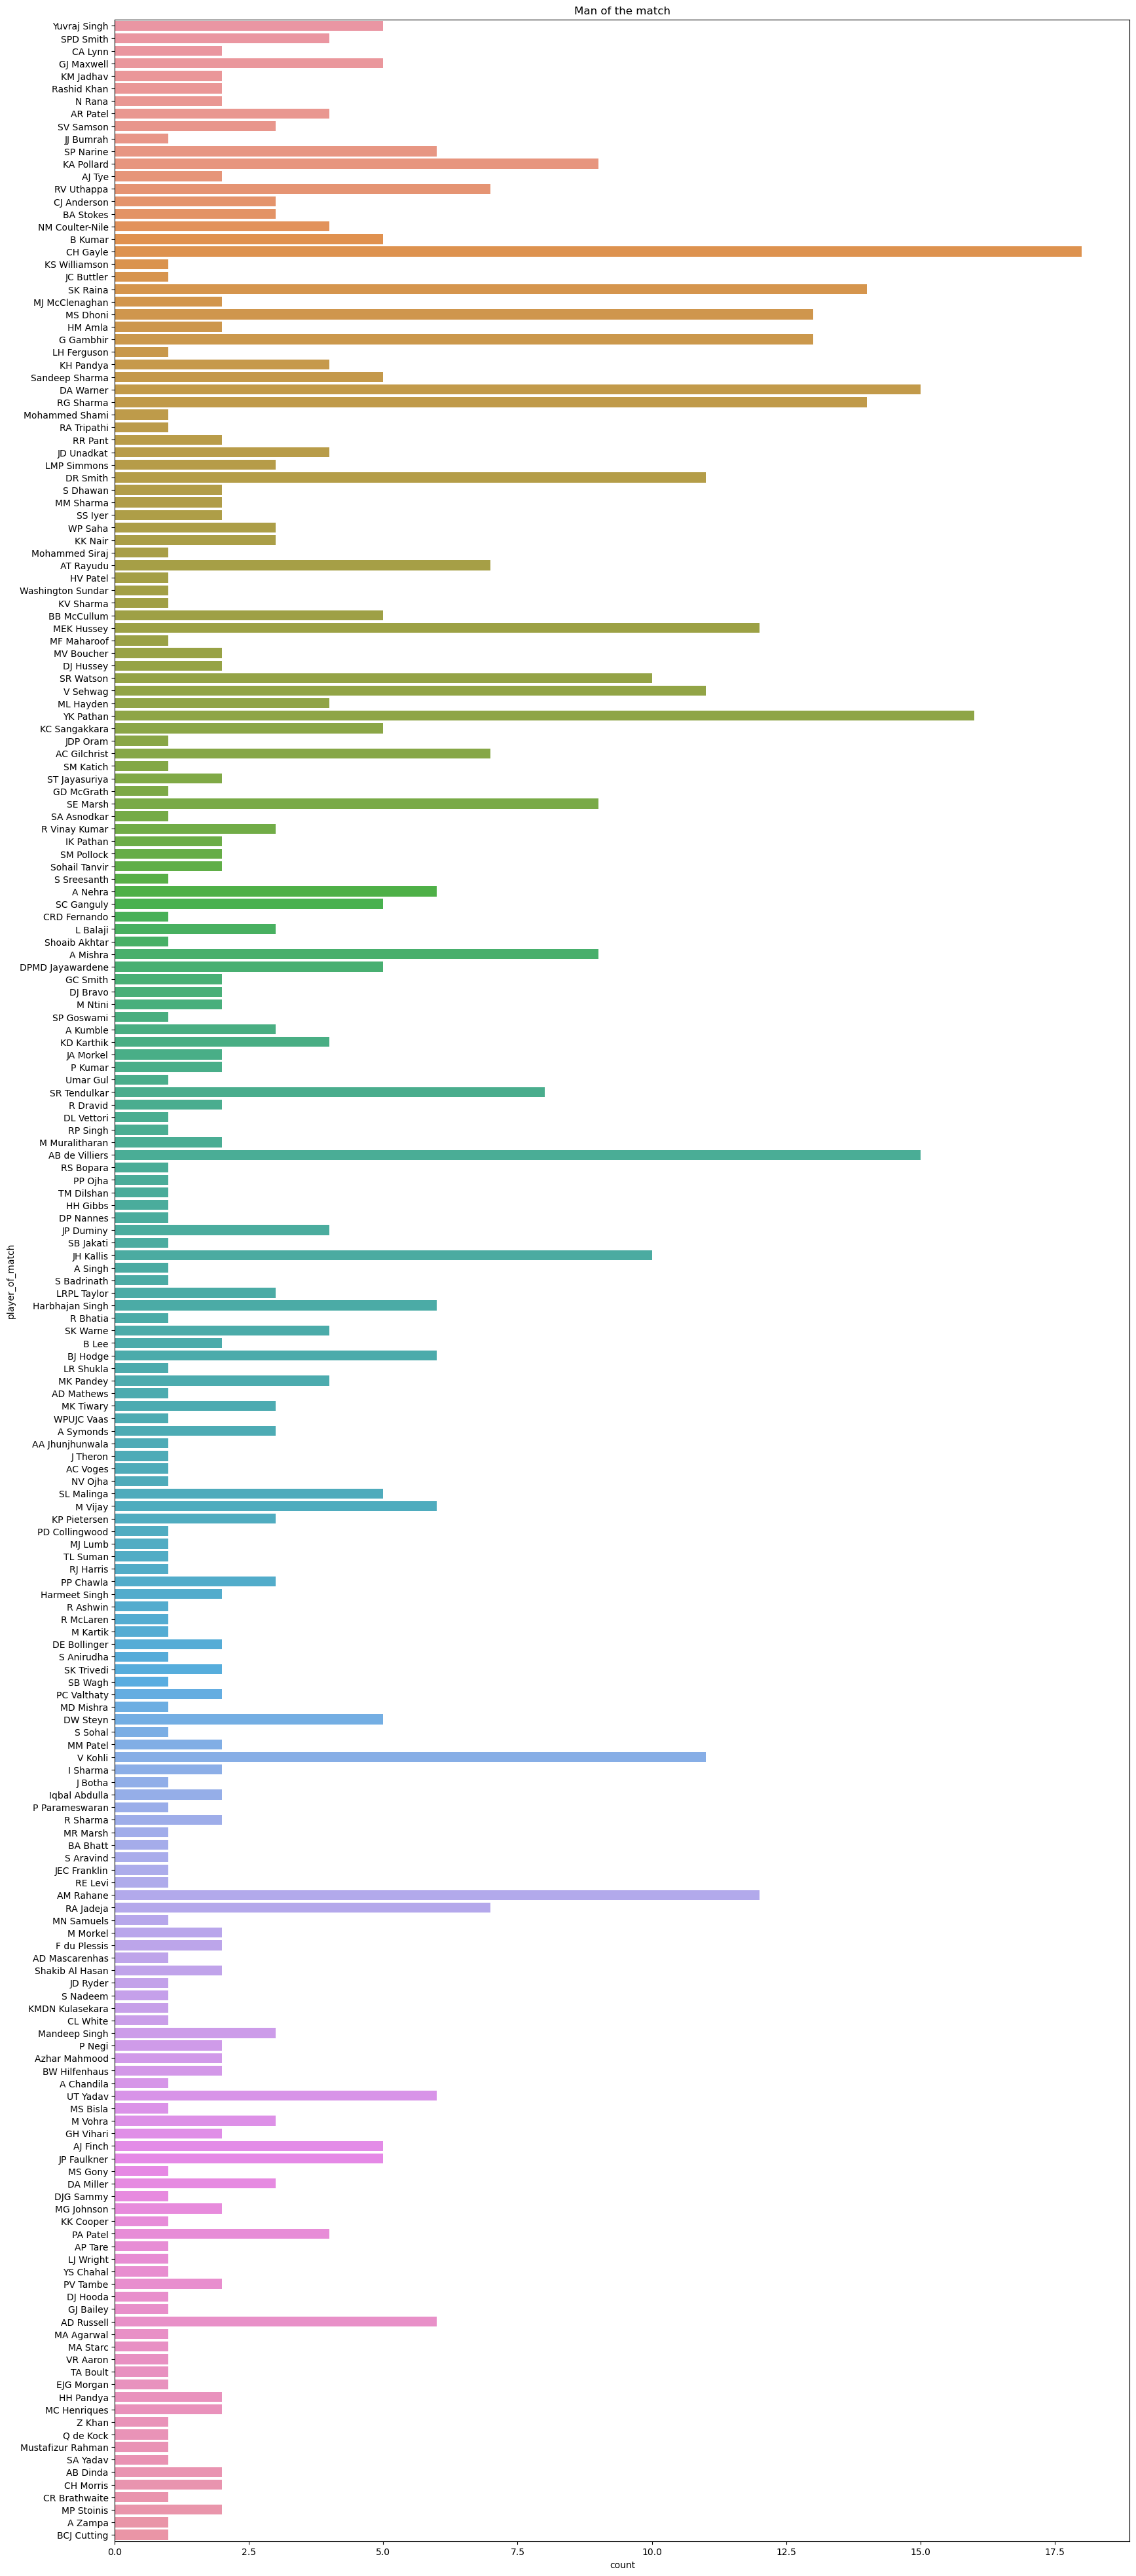

In [81]:
plt.figure(figsize=(20,50))
sns.countplot(y='player_of_match', data=matches)
plt.title("Man of the match")

# "Chris Gayle" won max times the man of the match title with app. 18 times

###  Matches played across each season

<Axes: xlabel='season', ylabel='count'>

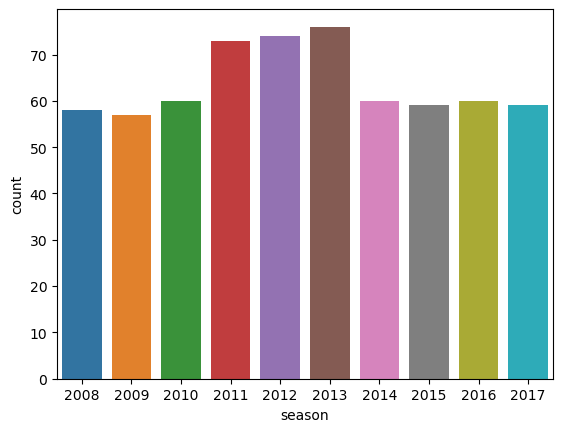

In [82]:
sns.countplot(x='season', data=matches)

###  Matches played in different stadium and whether field or batting team won

<Axes: xlabel='count', ylabel='venue'>

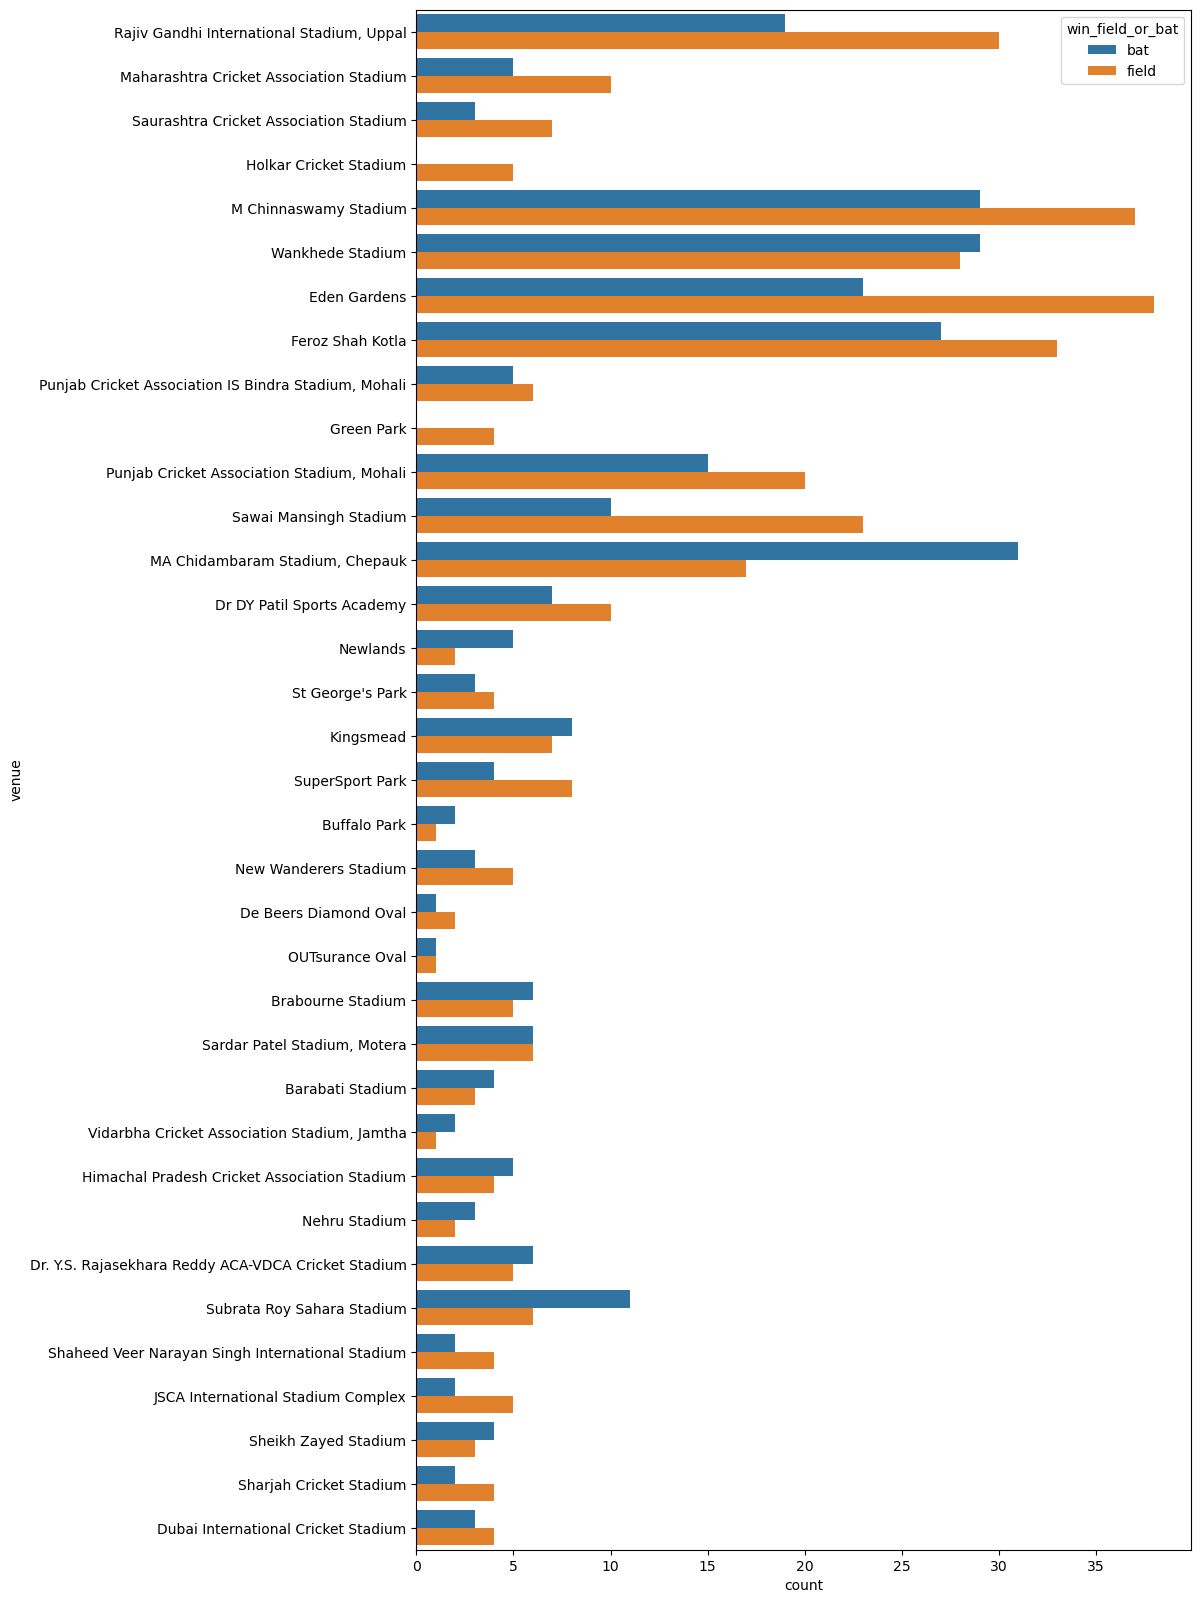

In [83]:
plt.figure(figsize=(10,20))
sns.countplot(y='venue', hue='win_field_or_bat', data=matches)

###  Umpire in most of the matches

In [85]:
u1 = matches.groupby('umpire1')['umpire1'].count().sort_values(ascending=False)
u2 = matches.groupby('umpire2')['umpire2'].count().sort_values(ascending=False)
umpire = u1.add(u2, fill_value=0)
print("Total number of umpires: {}".format(umpire.shape[0]))
umpire = umpire.sort_values(ascending=False)[0:10]

Total number of umpires: 54


Text(0.5, 1.0, 'Top 10 common umpires')

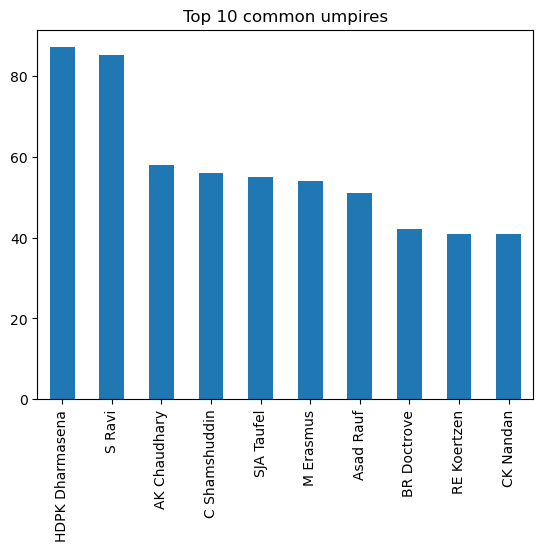

In [87]:
umpire.plot(kind='bar')
plt.title("Top 10 common umpires")


# Here, Dharamsena umpired in 87 matches which is higher in comparison to all other(54) umpires